<a href="https://colab.research.google.com/github/EtheSonX082531/PYTHON-CODES-AND-PROJECTS/blob/main/Perfect_Conditional_Edge_Langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [38]:
class AgentState(TypedDict):
      num1:int
      num2:int
      operation:str
      ans:int

In [39]:
def decide_operation(state:AgentState)->AgentState:
    return state

In [40]:
def router(state:AgentState)->str:
    if(state["operation"]=="+"):
         return "add_edge"
    else:
        return "subtract_edge"

In [41]:
def add_node(state:AgentState)->AgentState:
    state["ans"]=state["num1"]+state["num2"]
    return state

In [42]:
def subtract_node(state:AgentState)->AgentState:
    state["ans"]=state["num1"]-state["num2"]
    return state

In [43]:
graph=StateGraph(AgentState)

graph.add_node("decide_operation",decide_operation)
graph.add_node("add_node",add_node)
graph.add_node("subtract_node",subtract_node)

In [44]:
graph.add_edge(START,"decide_operation")

graph.add_conditional_edges(
   "decide_operation",
   router,
   {
      "add_edge":"add_node",
      "subtract_edge":"subtract_node"
   }
)

In [45]:
graph.add_edge("add_node",END)
graph.add_edge("subtract_node",END)

In [49]:
app=graph.compile()

output=app.invoke({"num1":7,"num2":8,"operation":"+"})

In [50]:
print(output["ans"])

15


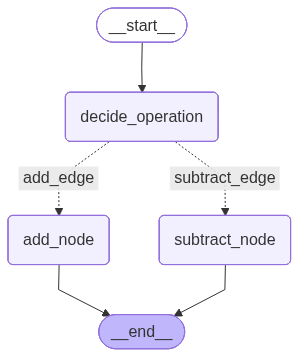

In [51]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))